# Pymaceuticals Inc.
---


### Analysis

- Add your analysis here.

**Mean Tumor Volume**:

- Drugs like Capomulin (40.675741) and Ramicane (40.216745) have lower mean tumor volumes compared to other regimens, suggesting they might be more effective in reducing tumor size.

**Median Tumor Volume**:

- The median values are close to the mean values, indicating a relatively symmetric distribution of tumor volumes for each drug regimen.

**Tumor Volume Variance**:


- Higher variance values, such as for Ketapril (68.553577) and Naftisol (66.173479), indicate a wider spread in tumor volumes, suggesting more variability in how mice respond to these treatments.

**Tumor Volume Std. Dev. (Standard Deviation)**:


- It gives an idea of the average deviation of tumor volumes from the mean.
- Regimens with higher standard deviations ( Ketapril: 8.279709) have more variability in tumor volumes.

**Tumor Volume Std. Err. (Standard Error)**:

- This column shows the standard error of the mean, which measures how accurately the sample mean estimates the population mean.
- Capomulin (0.329346) and Ramicane (0.320955) have lower standard errors, suggesting reliable mean tumor volume estimates.


Conclusion:
The summary statistics suggest that Capomulin and Ramicane are potentially more effective in reducing tumor volumes with more consistent results compared to other drug regimens. This information can guide further research and potential clinical applications.



From the graphs, we can observe the following:

1. **Positive Correlation**: There is a positive correlation between mouse weight and average tumor volume. As the weight of the mice increases, the average tumor volume also tends to increase.

2. **Linear Relationship**: The regression line (in red) suggests a linear relationship between mouse weight and average tumor volume. The upward slope of the regression line indicates that as the weight of the mice increases, the tumor volume also increases on average.


### Key Takeaway

The graphs demonstrates that there is a significant positive linear relationship between mouse weight and average tumor volume for the Capomulin regimen, suggesting that heavier mice tend to have larger tumors on average. This relationship is captured by the regression line, which can be used to predict average tumor volume based on mouse weight.


 

In [1]:
#Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"



In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [4]:
# Combine the data into a single DataFrame
mouse_and_study_combine = pd.merge(study_results,mouse_metadata, on="Mouse ID")


## COMBINED DATA TABLE

In [5]:
# Display the data table for preview
mouse_and_study_combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice.
mice_count = mouse_and_study_combine["Mouse ID"].unique()
print (len(mice_count))

249


## MOUSE ID AND TIMEPOINT TABLE

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_rows = mouse_and_study_combine[mouse_and_study_combine.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids = duplicate_rows["Mouse ID"].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_and_study_combine[mouse_and_study_combine["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Filter the combined_data DataFrame to exclude rows with Mouse ID 'g989'

filtered_data = mouse_and_study_combine[mouse_and_study_combine["Mouse ID"]!= "g989"]
cleaned_data =  filtered_data[filtered_data["Timepoint"] == 0]
cleaned_data




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [11]:
# Checking the number of mice in the clean DataFrame.
count_cleaned_data =  len(cleaned_data)
count_cleaned_data

248

In [12]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 1883
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            248 non-null    object 
 1   Timepoint           248 non-null    int64  
 2   Tumor Volume (mm3)  248 non-null    float64
 3   Metastatic Sites    248 non-null    int64  
 4   Drug Regimen        248 non-null    object 
 5   Sex                 248 non-null    object 
 6   Age_months          248 non-null    int64  
 7   Weight (g)          248 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 17.4+ KB


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_classic_method = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_classic_method = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_classic_method = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
#variance_classic_method
std_dev_classic_method = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
#std_dev_classic_method
sem_dev_classic_method = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem_dev_classic_method



Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Assemble the resulting series into a single summary DataFrame.

#compiling the statistical data in dictionaries
summary_statistical_data = {
    "Mean Tumor Volume": mean_classic_method,
    "Median Tumor Volume": median_classic_method,
    "Tumor Volume Variance": variance_classic_method,
    "Tumor Volume Std. Dev.": std_dev_classic_method,
    "Tumor Volume Std. Err.": sem_dev_classic_method,
}

#creating the dataframe

summary_statistical_data_df = pd.DataFrame(summary_statistical_data)
summary_statistical_data_df


# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
grouped_data = filtered_data.groupby('Drug Regimen')

mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()


summary_statistical_data_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
})

summary_statistical_data_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [16]:
filtered_data = mouse_and_study_combine[mouse_and_study_combine["Mouse ID"]!= "g989"]
mice_per_regimen = filtered_data.groupby("Drug Regimen")["Mouse ID"].count().reset_index(name="Observed Mouse Timepoints")
# I wanted to validate the data in a table
sorted_data = mice_per_regimen.sort_values(by="Observed Mouse Timepoints", ascending=False) 
sorted_data


,Drug Regimen,Observed Mouse Timepoints
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182
8,Stelasyn,181
5,Placebo,181
1,Ceftamin,178
2,Infubinol,178
6,Propriva,148


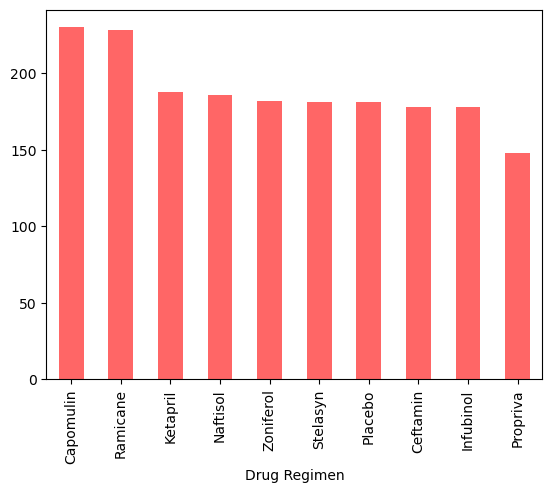

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
ax = sorted_data.plot.bar(x="Drug Regimen", y="Observed Mouse Timepoints", color="red", alpha=0.6, legend=False)
plt.show()

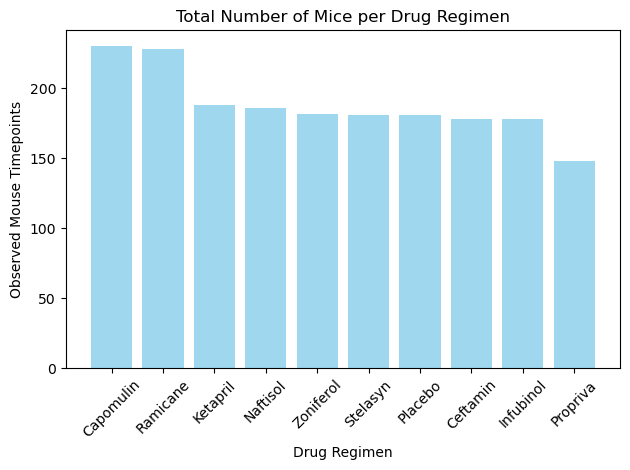

In [18]:

# Plot the bar chart

plt.bar(sorted_data["Drug Regimen"], sorted_data["Observed Mouse Timepoints"], color="skyblue", alpha = 0.8, align = "center")
plt.xlabel('Drug Regimen')
plt.ylabel('Observed Mouse Timepoints')
plt.title('Total Number of Mice per Drug Regimen')
plt.xticks(rotation=45) 
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

In [19]:

mice_sex = filtered_data.groupby("Sex")["Sex"].value_counts()
mice_sex

Sex
Female    922
Male      958
Name: count, dtype: int64

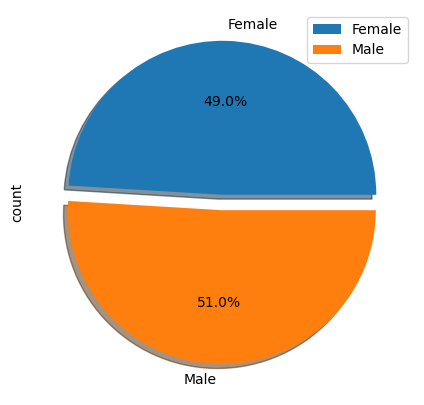

In [20]:
plot = mice_sex.plot.pie(y="Mice sex", figsize=(5, 5), legend="True", shadow=True,autopct='%1.1f%%',explode=[0.05, 0.05])

## Quartiles, Outliers and Boxplots

In [21]:
filtered_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin

# Setting the last (greatest) timepoint for each mouse
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_regimens = filtered_data[filtered_data["Drug Regimen"].isin(treatment_regimens)]
final_tumor_vol = filtered_regimens[filtered_regimens["Timepoint"] == 45]
final_tumor_vol = final_tumor_vol[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_vol





,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,b128,Capomulin,38.982878
224,c139,Infubinol,72.226731
243,y163,Infubinol,67.685569
253,k483,Infubinol,66.196912
279,z581,Infubinol,62.754451
...,...,...,...
1844,l897,Capomulin,38.846876
1857,t565,Capomulin,34.455298
1867,i557,Capomulin,47.685963
1877,m957,Capomulin,33.329098


In [23]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data = pd.merge(filtered_data,final_tumor_vol, on=["Mouse ID", "Drug Regimen"], suffixes=(" ", " t45"))
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3) t45
0,b128,0,45.000000,0,Capomulin,Female,9,22,38.982878
1,b128,5,45.651331,0,Capomulin,Female,9,22,38.982878
2,b128,10,43.270852,0,Capomulin,Female,9,22,38.982878
3,b128,15,43.784893,0,Capomulin,Female,9,22,38.982878
4,b128,20,42.731552,0,Capomulin,Female,9,22,38.982878
...,...,...,...,...,...,...,...,...,...
625,m601,25,33.118756,1,Capomulin,Male,22,17,28.430964
626,m601,30,31.758275,1,Capomulin,Male,22,17,28.430964
627,m601,35,30.834357,1,Capomulin,Male,22,17,28.430964
628,m601,40,31.378045,1,Capomulin,Male,22,17,28.430964


In [24]:
treatment_regimens

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in treatment_regimens:
    drug_data = final_tumor_vol[final_tumor_vol['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    tumor_vol_data.append({
        'Drug Regimen': drug,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': outliers.tolist()
    })

# Step 5: Print the results
for data in tumor_vol_data:
    print(f"Drug Regimen: {data['Drug Regimen']}")
    print(f"Lower Bound: {data['Lower Bound']}")
    print(f"Upper Bound: {data['Upper Bound']}")
    print(f"Outliers: {data['Outliers']}\n")


Drug Regimen: Capomulin
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Outliers: []

Drug Regimen: Ramicane
Lower Bound: 19.69048010125
Upper Bound: 49.79900043125001
Outliers: []

Drug Regimen: Infubinol
Lower Bound: 55.35777559500001
Upper Bound: 75.08224443499999
Outliers: []

Drug Regimen: Ceftamin
Lower Bound: 52.29350701999999
Upper Bound: 76.66786758
Outliers: []



In [26]:

# Locate the rows which contain mice on each drug and get the tumor volumes

# Initialize a dictionary to store the tumor volumes for each drug regimen
tumor_volumes_by_drug = {}

# Step 3: Loop through each drug in the treatment list
for drug in treatment_regimens:
    # Filter the DataFrame to get the tumor volumes for the current drug
    drug_data = final_tumor_vol[final_tumor_vol['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Store the tumor volumes in the dictionary
    tumor_volumes_by_drug[drug] = drug_data.tolist()

# Print the tumor volumes for each drug regimen
for drug, volumes in tumor_volumes_by_drug.items():
    print(f"Drug Regimen: {drug}")
    print(f"Tumor Volumes: {volumes}\n")
    
    # add subset 

    
    

Drug Regimen: Capomulin
Tumor Volumes: [38.98287774, 32.37735684, 23.34359787, 38.93963263, 28.48403281, 41.48300765, 40.72857787, 31.02392294, 38.1251644, 40.65812366, 36.04104736, 37.31184577, 41.58152074, 31.8962384, 40.1592203, 37.07402422, 38.84687569, 34.45529799, 47.68596303, 33.32909778, 28.43096411]

Drug Regimen: Ramicane
Tumor Volumes: [31.56046955, 38.4076183, 43.0475426, 37.31123552, 36.13485243, 22.05012627, 33.39765251, 37.22565033, 32.97852192, 33.56240217, 29.12847181, 38.81036633, 40.66771292, 30.56462509, 31.09533505, 30.27623175, 40.65900627, 30.63869575, 45.22086888, 36.37451039]

Drug Regimen: Infubinol
Tumor Volumes: [72.2267309, 67.68556862, 66.19691151, 62.75445141, 65.52574285, 67.97341878, 66.08306589, 62.43540402, 60.91876652]

Drug Regimen: Ceftamin
Tumor Volumes: [61.38666032, 64.29983003, 67.74866174, 64.72983655, 68.59474498, 59.85195552, 61.84902336, 67.52748237, 68.92318457, 62.99935619, 64.63494887, 61.43389223, 59.74190064]



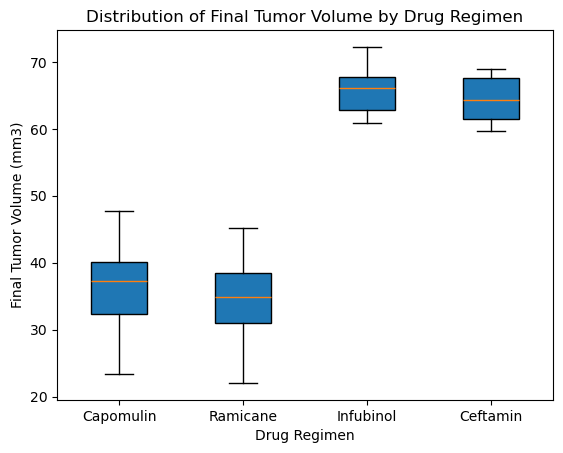

In [27]:
# Determine outliers using upper and lower bounds

fig, ax = plt.subplots()
bp = ax.boxplot([tumor_volumes_by_drug[drug] for drug in treatment_regimens] , patch_artist=True, flierprops=dict(marker='o', color='r', markersize=8))

ax.set_xticklabels(treatment_regimens)

# Set the title and labels
ax.set_title('Distribution of Final Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

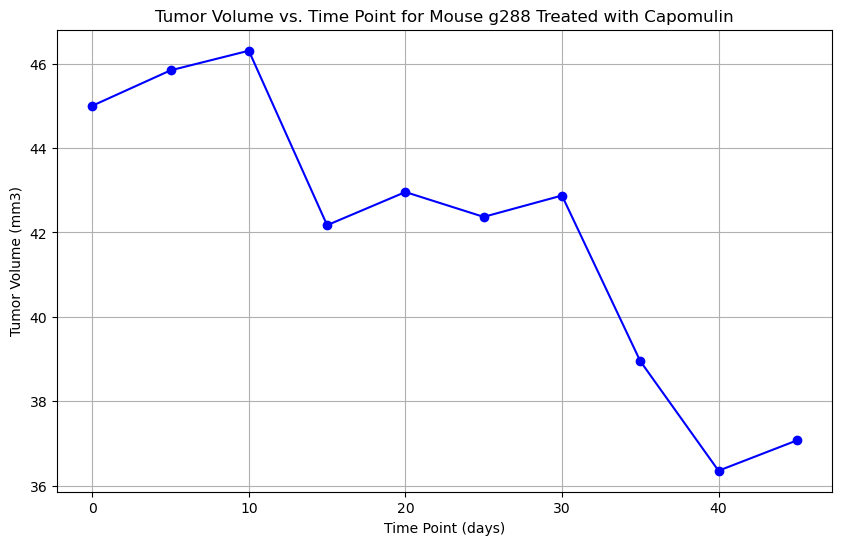

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 'g288'
drug_regimen = 'Capomulin'
mouse_data = filtered_data[(filtered_data['Mouse ID'] == mouse_id) & (filtered_data['Drug Regimen'] == drug_regimen)]

plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

#Set the title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with {drug_regimen}')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()

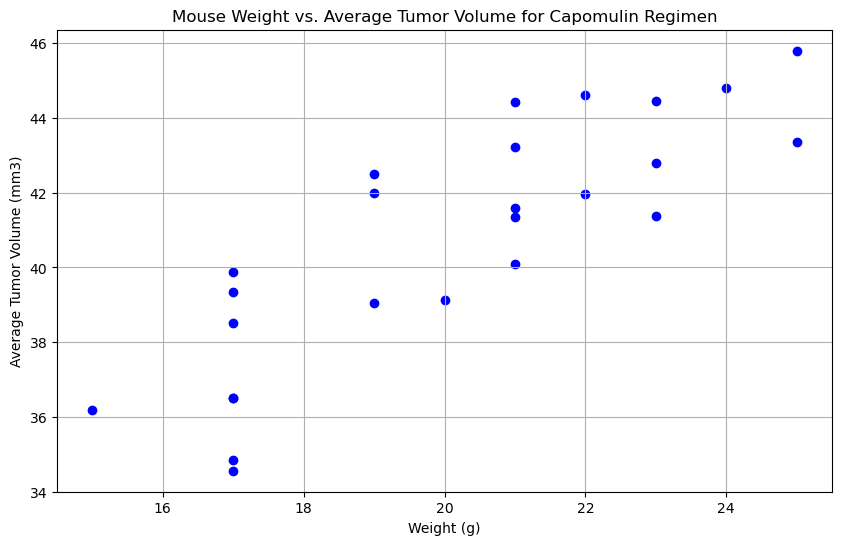

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = filtered_data[filtered_data["Drug Regimen"] == "Capomulin"]

avg_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()
#avg_tumor_volume

plt.figure(figsize=(10,6))
plt.scatter(avg_tumor_volume["Weight (g)"],avg_tumor_volume['Tumor Volume (mm3)'], marker='o', color='b')

#Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation coefficient: 0.8419363424694722
Slope: 0.9544396890241049, Intercept: 21.552160532685008
R-squared: 0.7088568047708723


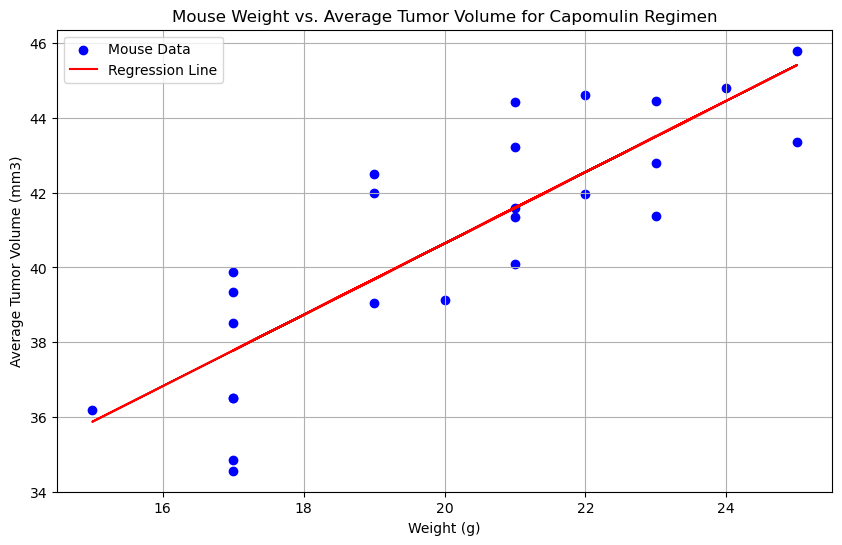

In [30]:
# Calculate the correlation coefficient and a linear regression model 

correlation_coef = np.corrcoef(avg_tumor_volume["Weight (g)"],avg_tumor_volume['Tumor Volume (mm3)'])[0, 1]
print(f"Correlation coefficient: {correlation_coef}")

slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_volume["Weight (g)"],avg_tumor_volume['Tumor Volume (mm3)'])
print(f"Slope: {slope}, Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

#Generate the scatter plot with the regression line using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume["Weight (g)"],avg_tumor_volume['Tumor Volume (mm3)'], marker='o', color='b', label='Mouse Data')

# Plot the regression line
regression_line = slope * np.array(avg_tumor_volume["Weight (g)"]) + intercept
plt.plot(avg_tumor_volume["Weight (g)"], regression_line, color='r', label='Regression Line')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
